In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Return if any of the entries are empty in the Features

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
# Number of rows

print(len(df))

# Number of Revenue Trues and Falses

print( df['Revenue'].value_counts() )

12330
False    10422
True      1908
Name: Revenue, dtype: int64


In [5]:
# Numerical Features
numerical_features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

df[numerical_features].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


In [6]:
# Categorical Features (excluding 'Revenue')
categorical_features = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]
target = "Revenue"

df[categorical_features].head()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month
0,1,1,1,1,Returning_Visitor,False,Feb
1,2,2,1,2,Returning_Visitor,False,Feb
2,4,1,9,3,Returning_Visitor,False,Feb
3,3,2,2,4,Returning_Visitor,False,Feb
4,3,3,1,4,Returning_Visitor,True,Feb


In [16]:
# Unique values in each categorical features
for cat in categorical_features:
    print("____________________________________________________________"+cat+": ")
    print(sorted(df[cat].unique()))
    print(df[cat].value_counts())

____________________________________________________________OperatingSystems: 
[1, 2, 3, 4, 5, 6, 7, 8]
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
____________________________________________________________Browser: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
____________________________________________________________Region: 
[1, 2, 3, 4, 5, 6, 7, 8, 9]
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
____________________________________________________________TrafficType: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7 

# Pre-processing

### Feature Transformation

In [22]:
# For this dataset, you should follow the same procedure as detailed in the reference paper to transform the data. 
new_df = df.copy()

def encodingHelper(list, item):
    newList = []
    for i in list:
        if str(i)==str(item):
            newList.append(1)
        else:
            newList.append(0)
    return newList

def targetEncodingHelper(list):
    newList = []
    for i in list:
        if i == False:
            newList.append(0)
        else:
            newList.append(1)
    return newList

# The categorical variables are mapped to 1-of-C coding
new_categorical_features = []
for cat in categorical_features:
    items = sorted(df[cat].unique())
    for item in items:
        new_df[cat+"_"+str(item)] = encodingHelper(new_df[cat], item)
        new_categorical_features.append(cat+"_"+str(item))
    new_df = new_df.drop(columns=cat)
    
# The categorical target feature is mapped to binary (1=True, 0=False) coding.
new_df[target] = targetEncodingHelper(new_df[target])

# All Discrete features should be classified as categorical
# new_df[new_categorical_features] = new_df[new_categorical_features].astype('category') 
# new_df[target] = new_df[target].astype('category')  

new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Revenue                        12330 non-null  int64  
 11  OperatingSystems_1             12330 non-null  int64  
 12  OperatingSystems_2             12330 non-null 

In [23]:
new_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# Unique values in each categorical features
for cat in new_categorical_features:
    print("____________________________________________________________"+cat+": ")
    print(sorted(new_df[cat].unique()))
    print(new_df[cat].value_counts())

____________________________________________________________OperatingSystems_1: 
[0, 1]
0    9745
1    2585
Name: OperatingSystems_1, dtype: int64
____________________________________________________________OperatingSystems_2: 
[0, 1]
1    6601
0    5729
Name: OperatingSystems_2, dtype: int64
____________________________________________________________OperatingSystems_3: 
[0, 1]
0    9775
1    2555
Name: OperatingSystems_3, dtype: int64
____________________________________________________________OperatingSystems_4: 
[0, 1]
0    11852
1      478
Name: OperatingSystems_4, dtype: int64
____________________________________________________________OperatingSystems_5: 
[0, 1]
0    12324
1        6
Name: OperatingSystems_5, dtype: int64
____________________________________________________________OperatingSystems_6: 
[0, 1]
0    12311
1       19
Name: OperatingSystems_6, dtype: int64
____________________________________________________________OperatingSystems_7: 
[0, 1]
0    12323
1        7
Na

In [25]:
print( new_df['Revenue'].value_counts() )

0    10422
1     1908
Name: Revenue, dtype: int64


In [26]:
# The numerical features are standardized to zero mean and unit variance
scaler = preprocessing.StandardScaler().fit(new_df[numerical_features])
new_df[numerical_features] = scaler.transform(new_df[numerical_features])

print("__________________________________________Mean:")
print(new_df[numerical_features].mean(axis=0))
print("___________________________________________STD:")
print(new_df[numerical_features].std(axis=0))

# Note that the scaler cannot make the mean EXACTLY zero due to number representation limitations. 
# In practice, this is close enough.

__________________________________________Mean:
Administrative            -1.375191e-15
Administrative_Duration    2.074316e-15
Informational              6.987391e-15
Informational_Duration     1.765777e-16
ProductRelated            -2.849753e-16
ProductRelated_Duration    1.021684e-15
BounceRates                1.333384e-15
ExitRates                 -2.622846e-16
PageValues                -4.953810e-15
SpecialDay                -1.722823e-14
dtype: float64
___________________________________________STD:
Administrative             1.000041
Administrative_Duration    1.000041
Informational              1.000041
Informational_Duration     1.000041
ProductRelated             1.000041
ProductRelated_Duration    1.000041
BounceRates                1.000041
ExitRates                  1.000041
PageValues                 1.000041
SpecialDay                 1.000041
dtype: float64


In [27]:
# Put the transformed data into a new csv file.

new_df.to_csv('preprocessedData.csv') 

### Feature Selection 

In [13]:
# For feature selection, use one (1) correlation-based feature selection process. 

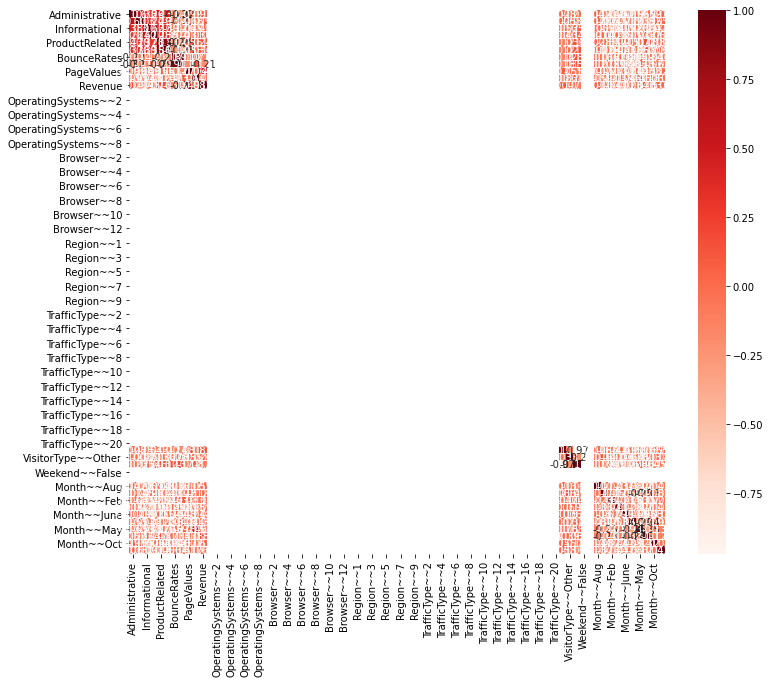

In [14]:
plt.figure(figsize=(12,10))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
plt.savefig('correlationMatrix.pdf')